# Diurnal Cycle

This notebook aims at inroducing new users on how to use the PCDMI diurnal cycle drivers.

This diagram shows how various drivers are linked together:

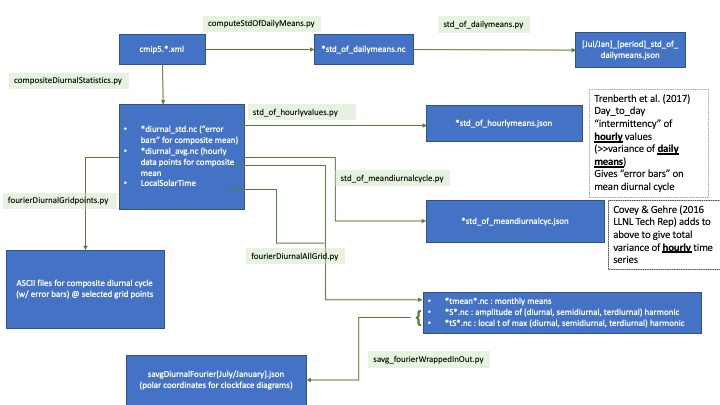

In [1]:
from IPython.display import Image
Image(filename =r'../../Diurnal_Cycle_Diagram.png')

To run the following demo, it is expected that you have downloaded the sample data as demonstrated in [the download notebook](Demo_0_download_data.ipynb)

For this tutorial we will be using 3 years worth of 3 hourly data resmapled to a 5x5 grid

In [ ]:
from user_choices import demo_data_directory, demo_output_directory

## Daily Means

Like all other drivers in the PCMDI Metrics Package, Diurnal Cycle relies on parameter input files

Our first driver starts from cmip5 data and computes the daily means

In [ ]:
with open("basic_diurnal_compute_daily_mean.py") as f:
    print(f.read())

Now to run this simply call the driver
```
computeStdOfDailyMeans.py -p basic_diurnal_compute_daily_mean.py
```

In [ ]:
%%bash
computeStdOfDailyMeans.py -p basic_diurnal_compute_daily_mean.py

This generates a netcdf file `pr_IPSL-CM5A-LR_Jul_1997-1999_std_of_dailymeans.nc` which contains the daily standard deviation at each cell

## Standard Deviation of Daily Means

Looking at our diagram the next driver to run is the one computing the mean of the standard deviation from daily means over a region of interest.

In [ ]:
with open("basic_diurnal_std_daily_mean.py") as f:
    print(f.read())

Now to run this simply call the driver
```
std_of_dailymeans.py -p basic_diurnal_std_daily_mean.py
```

In [ ]:
%%bash
std_of_dailymeans.py -p basic_diurnal_std_daily_mean.py

This generates a json file: `pr_Jul_1997_1999_std_of_dailymeans.json`

OPTIONAL: You could also append a new region to this json file by overwritting some of our parameters from the command line:

In [ ]:
%%bash
std_of_dailymeans.py -p basic_diurnal_std_daily_mean.py \
--region_name=TROPICS \
--lat1=-30. \
--lat2=30. \
--lon1=0. \
--lon2=360 \
--append

## Diurnal Composite

Looking again at our diagram we can now start again from the original 3 hourly data, and run the *composite* script

In [ ]:
with open("basic_diurnal_composite.py") as f:
    print(f.read())

In [ ]:
%%bash
compositeDiurnalStatistics.py -p basic_diurnal_composite.py

This produces 3 output files:
```
pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_avg.nc
pr_IPSL-CM5A-LR_Jul_1997-1999_diurnal_std.nc
pr_IPSL-CM5A-LR_LocalSolarTimes.nc
```

Containing respectively ???, ??? and ???

We can now generate ASCII files for composite diurnal cycle (w/	error	bars) at selected grid points using the `fourierDiurnalGridpoints.py` script.

In [ ]:
%%bash
fourierDiurnalGridpoints.py -p basic_diurnal_fourier.py

This produces an ascii file: `pr_Jul_1997-1999_fourierDiurnalGridPoints.asc` 

## Standard Deviation of Hourly Values

Starting again from the composite results our diagram suggests we now compute the std of hourly values

In [ ]:
with open("basic_diurnal_std_hourly_mean.py") as f:
    print(f.read())

In [ ]:
%%bash
std_of_hourlyvalues.py -p basic_diurnal_std_hourly_mean.py

This generated the following file:
    `pr_Jul_1997-1999_std_of_hourlymeans.json`
    
This file is used in Trenberth	et	al.	(2017) Day_to_day “intermittency” of hourly values (>>variance of daily means) Gives “error bars” on mean diurnal cycle


Going back to the results of *composite* we can now run: `std_of_meandiurnalcycle.py` which can use the same input parameter file

In [ ]:
with open("basic_diurnal_std_hourly_mean.py") as f:
    print(f.read())

In [ ]:
%%bash
std_of_meandiurnalcycle.py -p basic_diurnal_std_hourly_mean.py

This generates the following file: `pr_Jul_1997-1999_std_of_meandiurnalcyc.json`

## Fourier Analysis

Again starting from the *composite* results let's do the fourier analysis.

In [ ]:
with open("basic_diurnal_fourierAllGrid.py") as f:
    print(f.read())

In [ ]:
%%bash
fourierDiurnalAllGrid.py -p basic_diurnal_fourierAllGrid.py

This generates 3 files:

```
pr_IPSL-CM5A-LR_Jul_1997-1999_tmean.nc
pr_IPSL-CM5A-LR_Jul_1997-1999_S.nc
pr_IPSL-CM5A-LR_Jul_1997-1999_tS.nc
```


We can now run the last script: `savg_fourierWrappedInOut.py`

In [ ]:
%%bash
savg_fourier.py -p basic_diurnal_std_hourly_mean.py

This creates the follwoing file:

```
pr_Jul_1997-1999_savg_DiurnalFourier.json
```